In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:

file_id = "1Jemrls9JE8tIx17eT7XAxidFBHIYBJJb"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

exam_df = pd.read_csv(download_url)
exam_df.head()



,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [132]:
exam_df.drop(columns=['student_id'], inplace=True)

In [133]:
exam_df.shape

(20000, 12)

In [134]:
exam_df.columns

Index(['age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [135]:
exam_df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [136]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [137]:
num_cols=exam_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols=exam_df.select_dtypes(include=['object']).columns.tolist()

In [138]:
def scatter_plot(name_x, name_y, data=exam_df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=name_x, y=name_y)
    plt.title(f'Scatter Plot of {name_x} vs {name_y}')
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.show()

def histogram_plot(name, data=exam_df):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=name, kde=True)
    plt.title(f'Histogram of {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.show()

def count_plot(name, data=exam_df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=name)
    plt.title(f'Bar Plot of {name}')
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.show()

def bar_plot(name_x, name_y, data=exam_df):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=name_x, y=name_y)
    plt.title(f'Bar Plot of {name_x} vs {name_y}')
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.show()


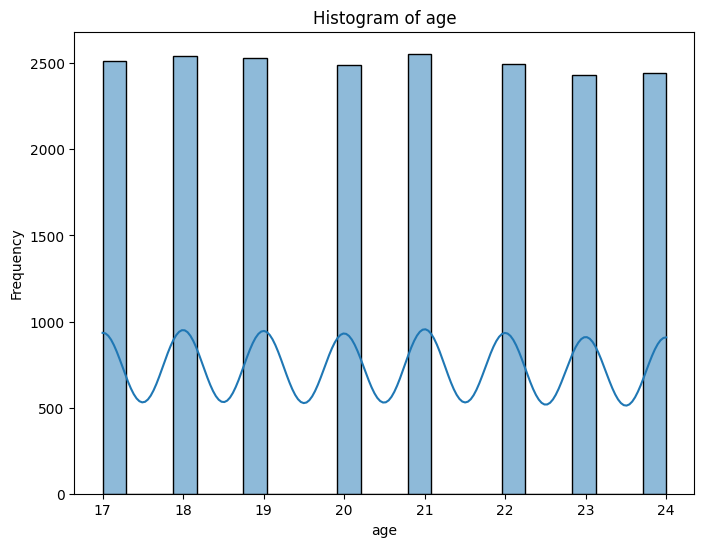

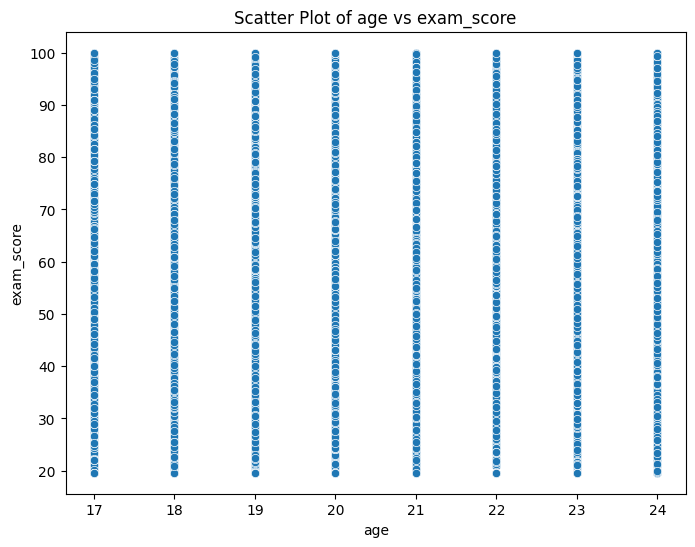

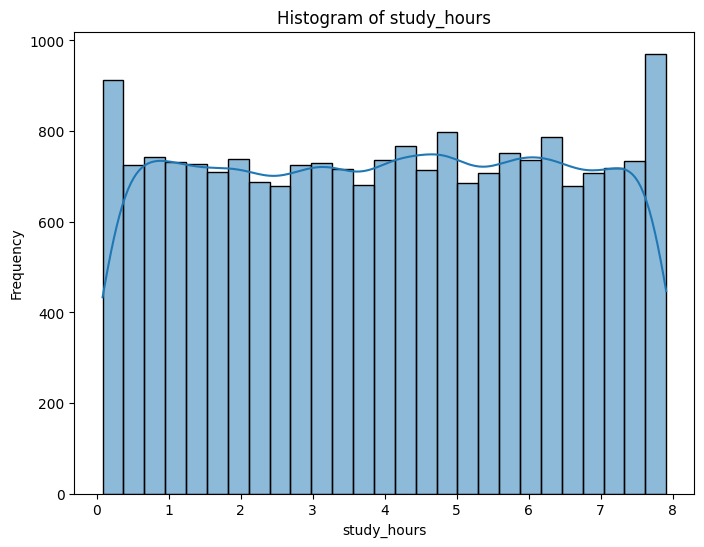

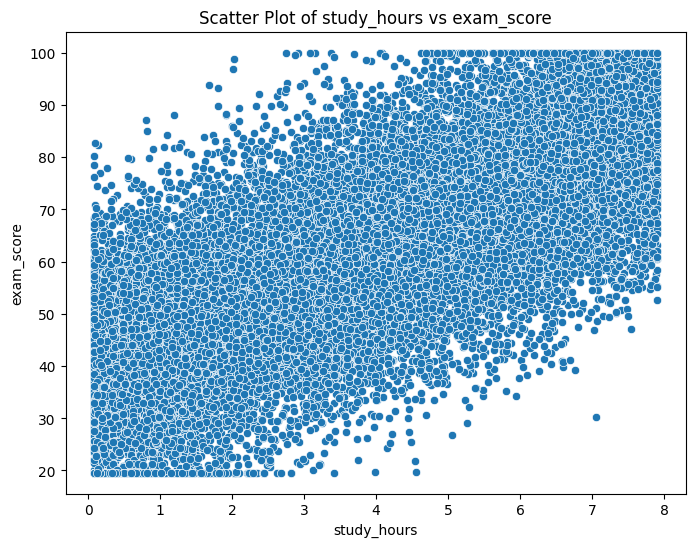

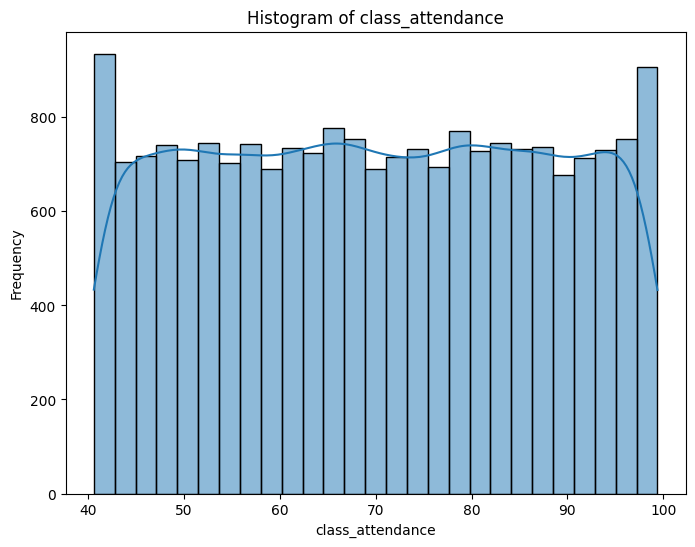

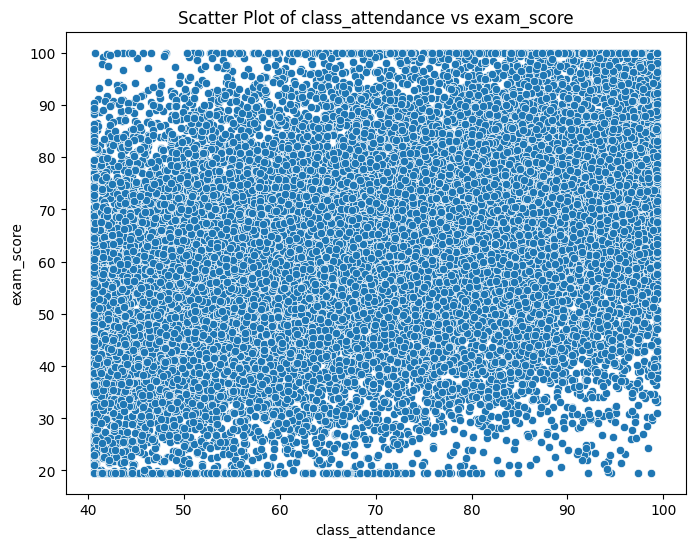

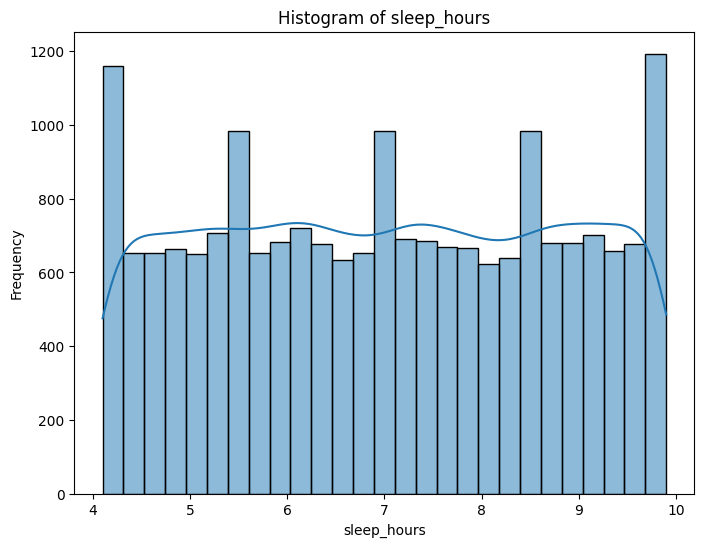

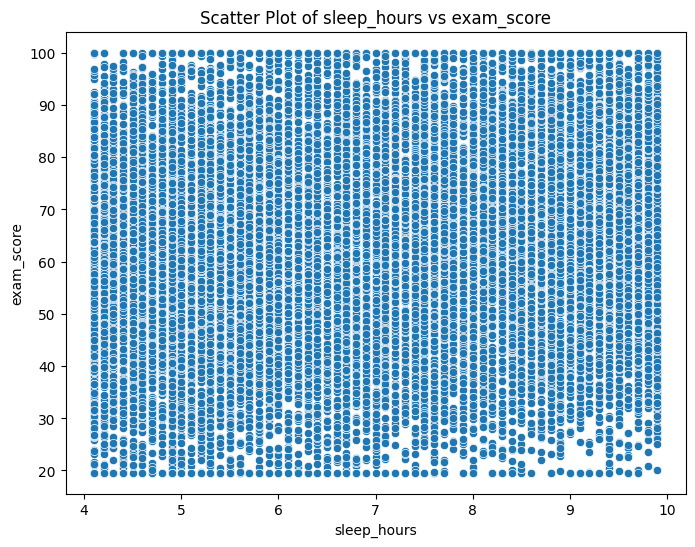

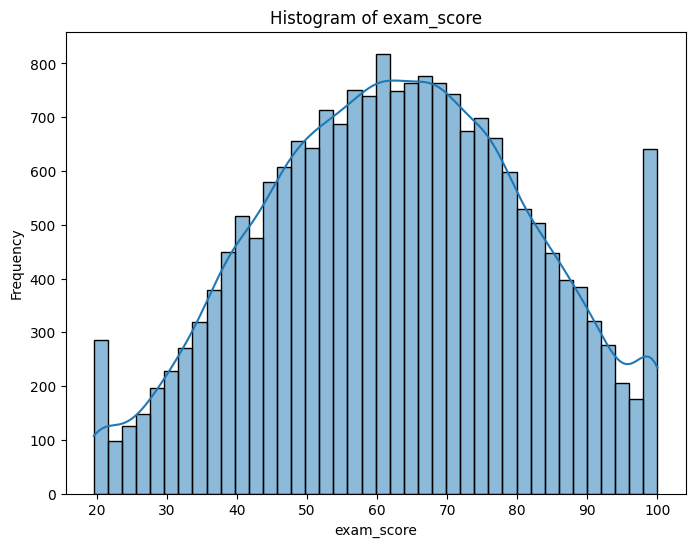

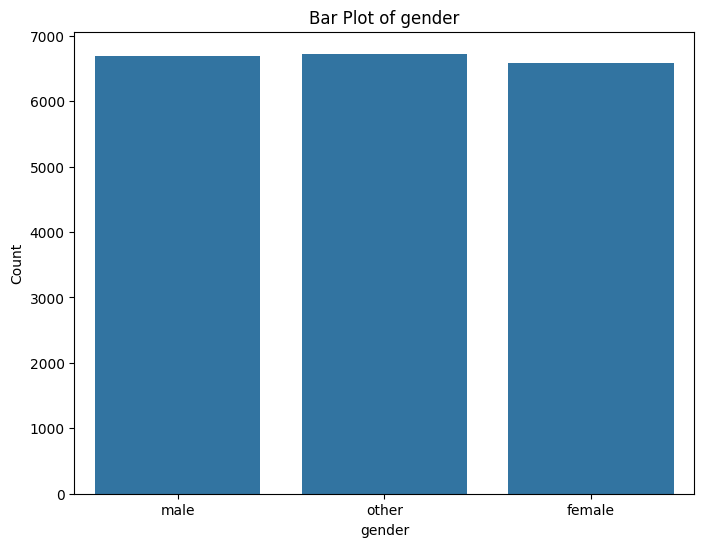

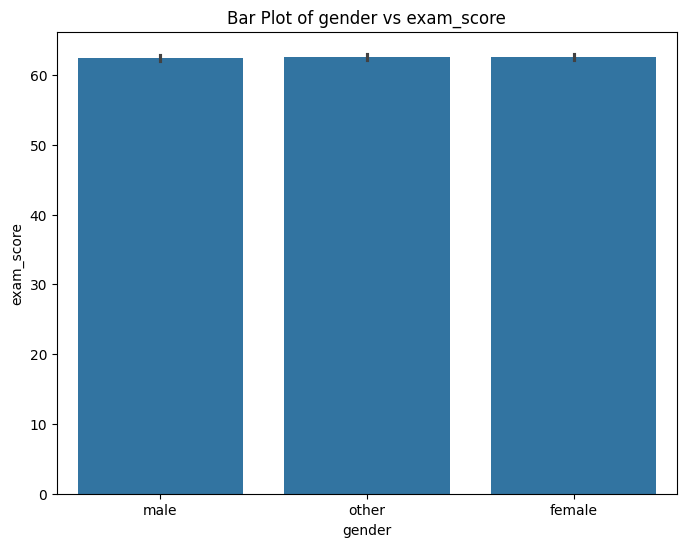

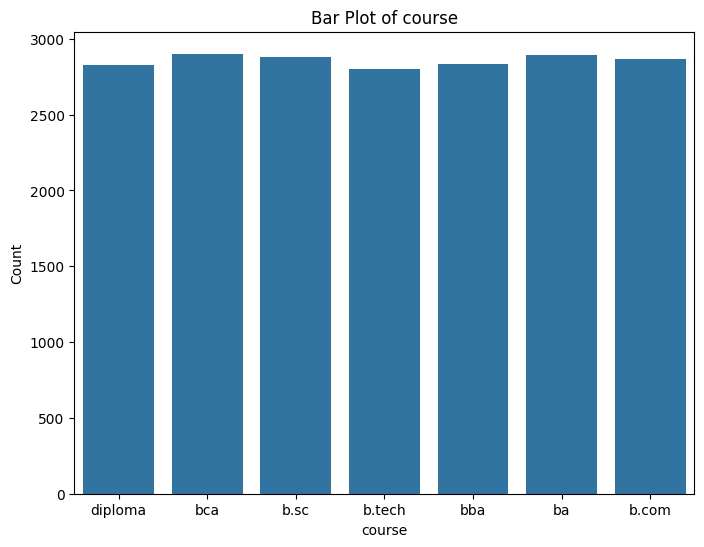

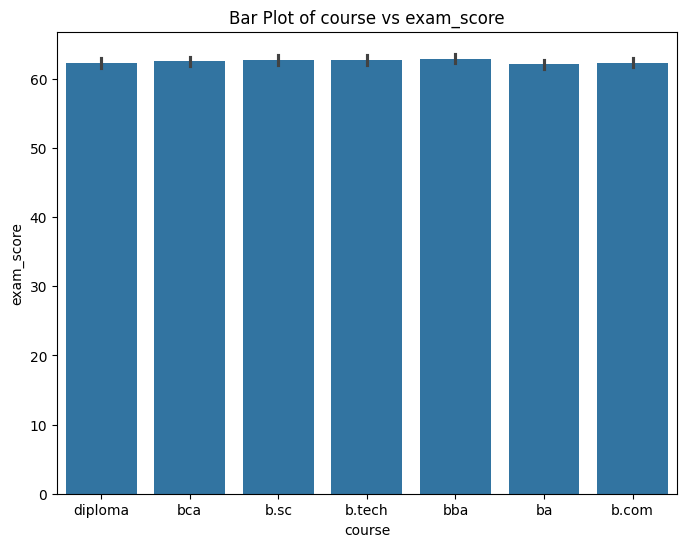

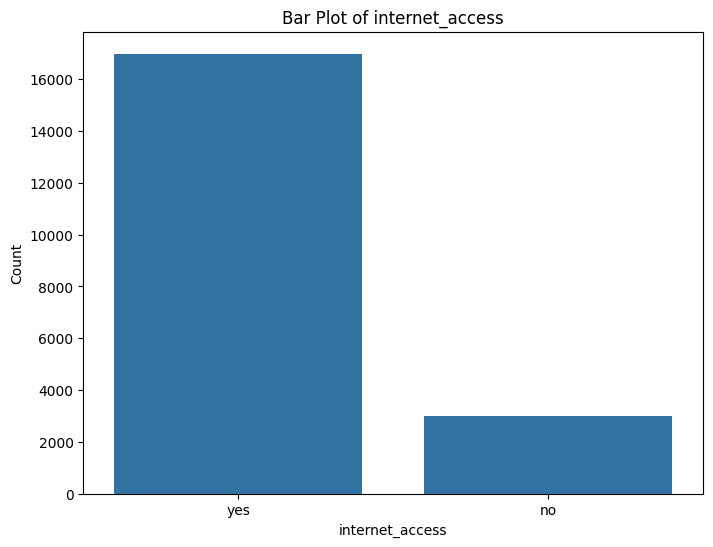

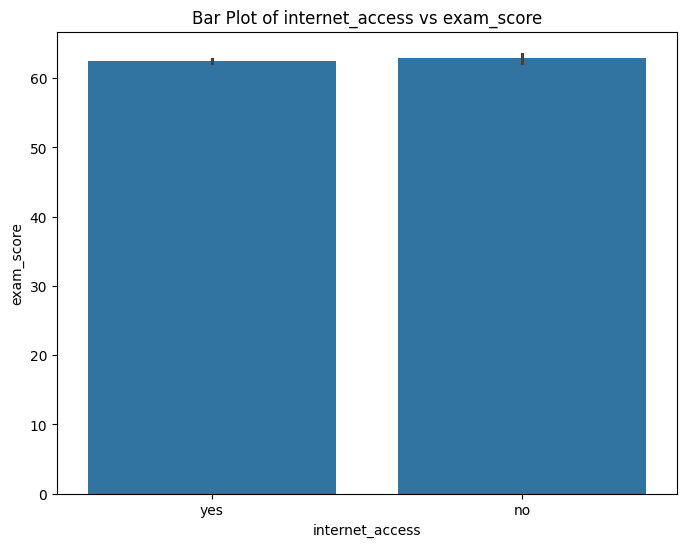

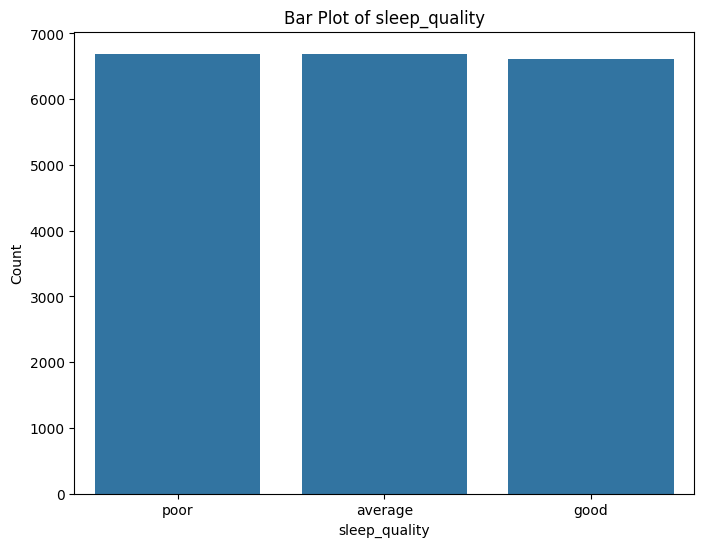

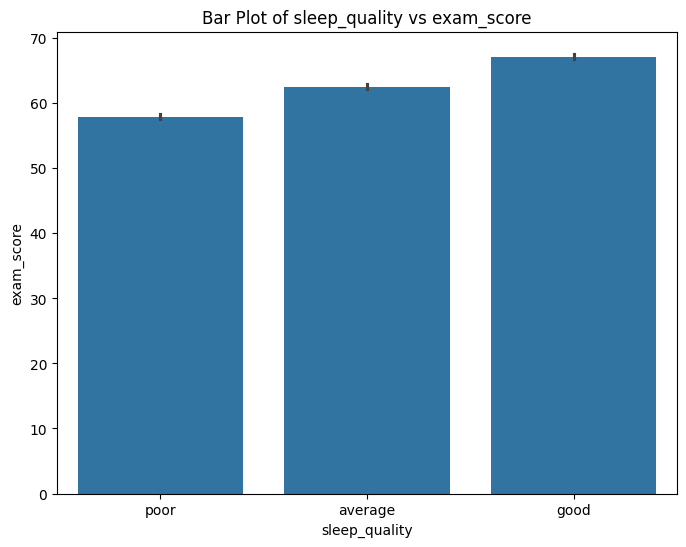

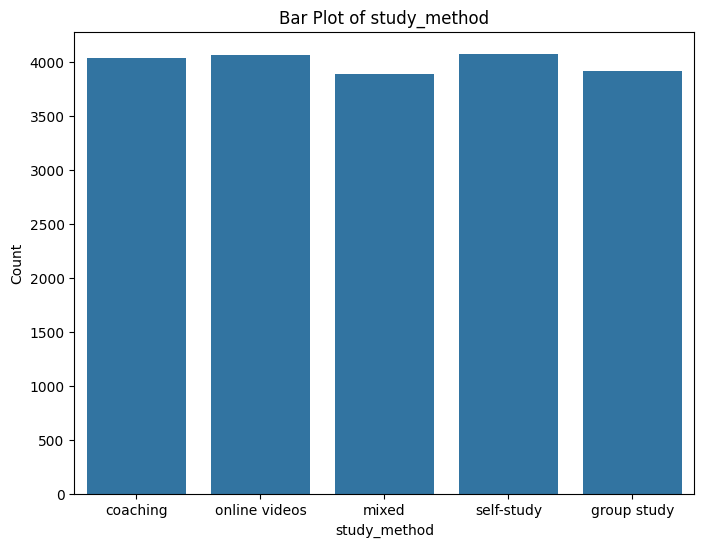

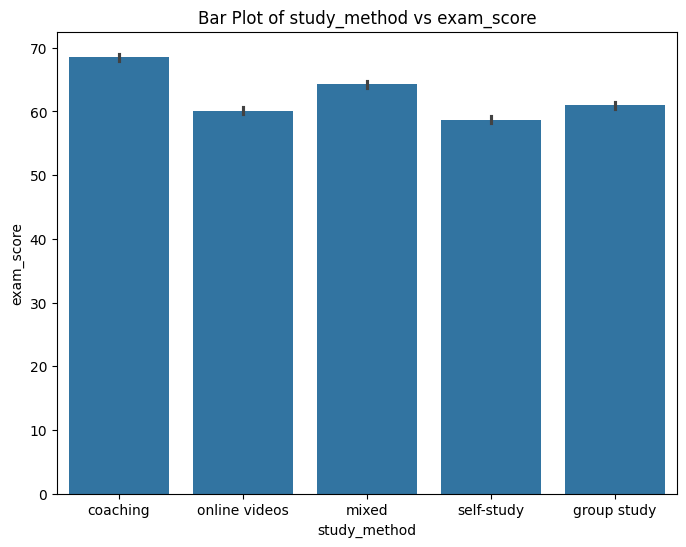

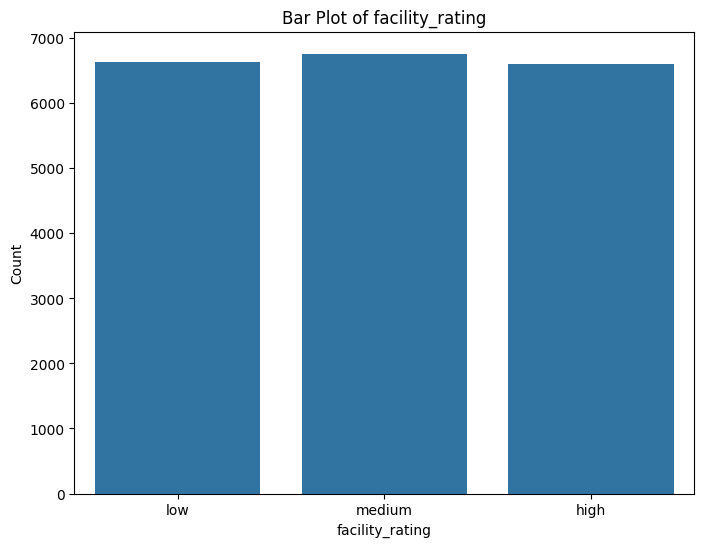

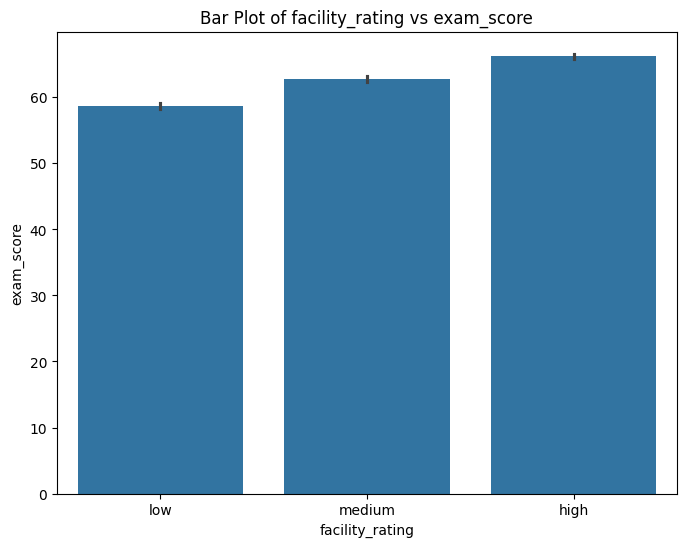

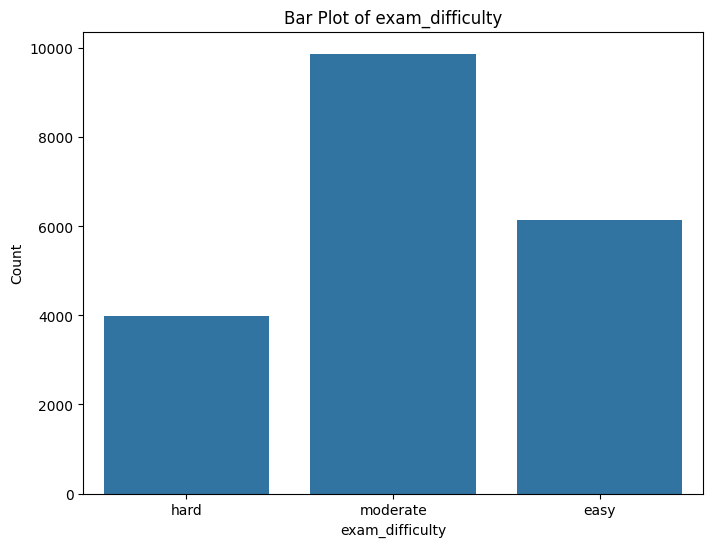

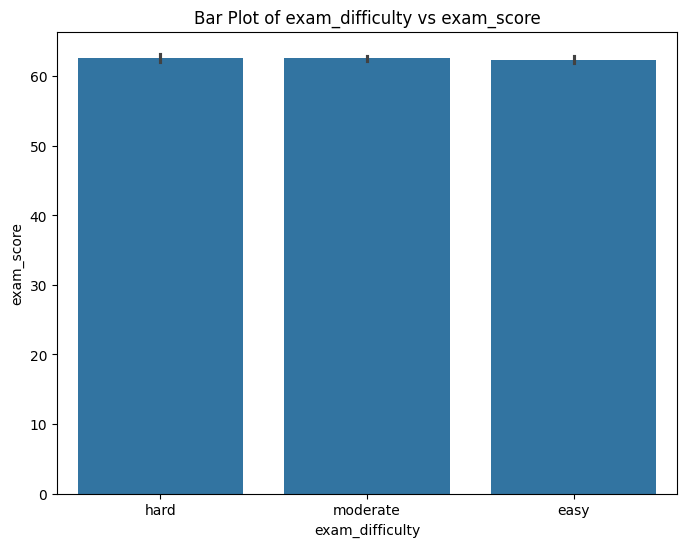

In [139]:
for col in num_cols:
    histogram_plot(col)
    if col != 'exam_score':
        scatter_plot(col, 'exam_score')

for col in cat_cols:
    count_plot(col)
    bar_plot(col, 'exam_score')

In [140]:
for col in exam_df.columns:
    print(f"{col}: {exam_df[col].nunique()} unique values")
    print(exam_df[col].value_counts().head(20))
    print("-" * 30)

age: 8 unique values
age
21    2555
18    2542
19    2528
17    2514
22    2497
20    2488
24    2443
23    2433
Name: count, dtype: int64
------------------------------
gender: 3 unique values
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64
------------------------------
course: 7 unique values
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64
------------------------------
study_hours: 784 unique values
study_hours
7.91    225
0.08    210
5.61     42
2.81     41
0.90     41
1.47     40
5.23     39
2.94     39
0.81     38
6.33     38
6.24     38
1.98     37
1.19     36
3.44     36
6.62     36
6.48     36
5.68     36
4.86     36
5.82     36
3.21     36
Name: count, dtype: int64
------------------------------
class_attendance: 589 unique values
class_attendance
40.6    226
99.4    212
48.0     53
49.2     48
42.1     48
78.0     47
61.7     47
52.7     46
78.4    

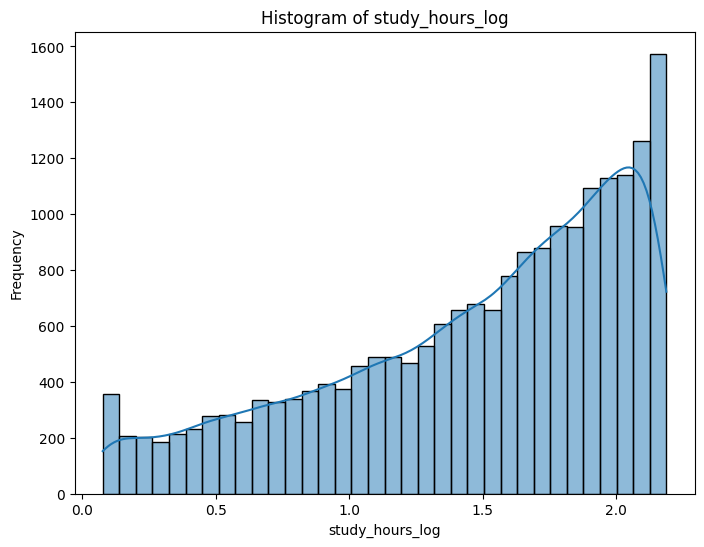

In [141]:
exam_df_copy=exam_df.copy()
exam_df_copy['study_hours_log']=np.log1p(exam_df_copy['study_hours'])
histogram_plot('study_hours_log', exam_df_copy)

In [142]:

skew_before = exam_df['study_hours'].skew()
skew_after = exam_df_copy['study_hours_log'].skew()

print(f"Skewness before log transformation: {skew_before}")
print(f"Skewness after log transformation: {skew_after}")

Skewness before log transformation: -0.010298675729341284
Skewness after log transformation: -0.7430733364796758


In [143]:
exam_df_copy.drop(columns=['study_hours_log'], inplace=True)

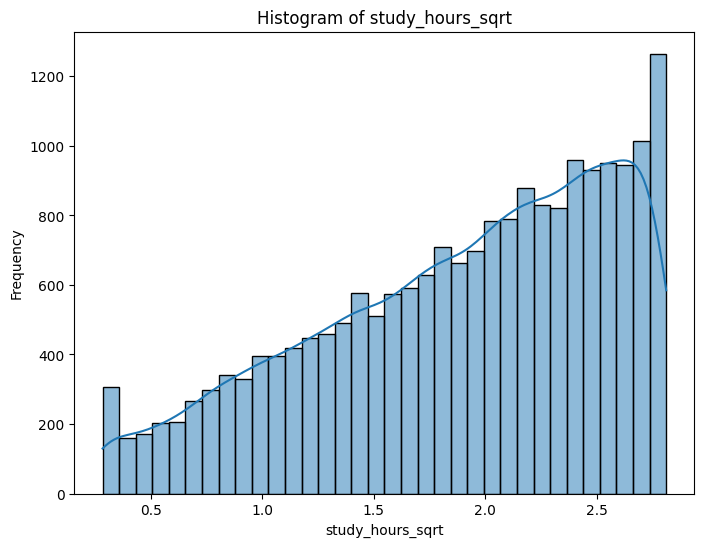

In [144]:
exam_df_copy['study_hours_sqrt']=np.sqrt(exam_df_copy['study_hours'])

histogram_plot('study_hours_sqrt', exam_df_copy)

In [145]:
exam_df_copy.drop(columns=['study_hours_sqrt'], inplace=True)

In [146]:
from scipy.stats import boxcox

exam_df_copy['study_hours_boxcox'], _ = boxcox(exam_df_copy['study_hours'] + 1)  # Adding 1 to avoid zero values

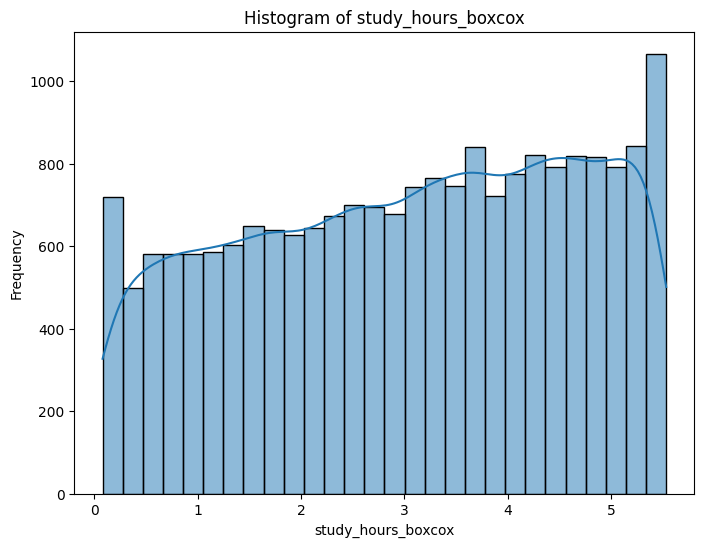

In [147]:
histogram_plot('study_hours_boxcox', exam_df_copy)

In [148]:
exam_df_copy.drop(columns=['study_hours_boxcox'], inplace=True)

In [149]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [150]:
exam_df_copy['study_hours'] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(exam_df_copy[['study_hours']])
exam_df_copy['sleep_hours'] = PowerTransformer(method='yeo-johnson', standardize=False).fit_transform(exam_df_copy[['sleep_hours']])


In [151]:
numerical_features = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

binary_features = ['internet_access']

ordinal_features = ['sleep_quality', 'facility_rating', 'exam_difficulty']
ordinal_categories = [
    ['poor', 'average', 'good'],      
    ['low', 'medium', 'high'],      
    ['easy', 'moderate', 'hard']      
]

nominal_features = ['gender', 'course', 'study_method']

In [152]:
preprocessor = ColumnTransformer(
    transformers=[
        # Numerik: lewati (tidak diubah)
        ('num', 'passthrough', numerical_features),
        
        # Biner: label encode (yes/no → 0/1)
        ('bin', OrdinalEncoder(categories=[['no', 'yes']]), binary_features),
        
        # Ordinal: label encode dengan urutan
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        
        # Nominal: one-hot encode
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_features)
    ],
    remainder='drop'  # abaikan kolom lain (misal: exam_score jika ikut masuk)
)

In [ ]:
X = exam_df_copy.drop(columns=['exam_score'])
y = exam_df_copy['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed



AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [154]:
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()

x_train_scaled=Scaler.fit_transform(X_train_processed)
x_test_scaled=Scaler.transform(X_test_processed)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 96.4334405348893
Root Mean Squared Error: 9.820052980248594
Mean Absolute Error: 7.908798396736109
R-squared: 0.7304046840469383


In [163]:
# Ambil nama fitur hasil one-hot
feature_names = (
    numerical_features +
    binary_features +
    ordinal_features +
    preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features).tolist()
)

# Sekarang X_train_processed bisa di-DataFrame-kan
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

print("Bentuk akhir data:", X_train_df.shape)
print("Contoh kolom hasil:", X_train_df.columns.tolist()[:10])

X_train_df.head()


Bentuk akhir data: (16000, 20)
Contoh kolom hasil: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'internet_access', 'sleep_quality', 'facility_rating', 'exam_difficulty', 'gender_male', 'gender_other']


,age,study_hours,class_attendance,sleep_hours,internet_access,sleep_quality,facility_rating,exam_difficulty,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,21.0,4.922832,57.1,6.146801,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19.0,4.946630,54.8,6.202710,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20.0,4.056675,99.4,5.348377,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.0,3.599411,47.6,4.996327,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17.0,2.993365,78.6,5.464337,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
